In [2]:
#import packages and dataset
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

data_path = '../../data/cleaned_riot_data/league_combined_with_chall_cleaned.csv'
combined_league_ranks = pd.read_csv(data_path, index_col=None)

In [3]:
"""
Perform initial cleaning again similar to PCA:
"""

#normalize variables that are time-dependent with the time variable
#do this for variables: kills, deaths, dmgObj, dmgTurr, vision_score, totalDmg, 
#totalDmgTaken, totalMinions, and gold
combined_league_ranks['kills/min'] = combined_league_ranks['kills']/combined_league_ranks['time']
combined_league_ranks['deaths/min'] = combined_league_ranks['deaths']/combined_league_ranks['time']
combined_league_ranks['dmgObj/min'] = combined_league_ranks['dmgObj']/combined_league_ranks['time']
combined_league_ranks['dmgTurr/min'] = combined_league_ranks['dmgTurr']/combined_league_ranks['time']
combined_league_ranks['vision_score/min'] = combined_league_ranks['vision_score']/combined_league_ranks['time']
combined_league_ranks['dmg/min'] = combined_league_ranks['totalDmg']/combined_league_ranks['time']
combined_league_ranks['dmgTaken/min'] = combined_league_ranks['totalDmgTaken']/combined_league_ranks['time']
combined_league_ranks['minions/min'] = combined_league_ranks['totalMinions']/combined_league_ranks['time']
combined_league_ranks['gold/min'] = combined_league_ranks['gold']/combined_league_ranks['time']


#remove the time-dependent columns that did not include time as a rate
combined_league_ranks = combined_league_ranks.drop('kills', axis=1)
combined_league_ranks = combined_league_ranks.drop('deaths', axis=1)
combined_league_ranks = combined_league_ranks.drop('dmgObj', axis=1)
combined_league_ranks = combined_league_ranks.drop('dmgTurr', axis=1)
combined_league_ranks = combined_league_ranks.drop('vision_score', axis=1)
combined_league_ranks = combined_league_ranks.drop('totalDmg', axis=1)
combined_league_ranks = combined_league_ranks.drop('totalDmgTaken', axis=1)
combined_league_ranks = combined_league_ranks.drop('totalMinions', axis=1)
combined_league_ranks = combined_league_ranks.drop('gold', axis=1)

#remove non-numerical columns and time columns
combined_league_ranks = combined_league_ranks.drop('time', axis=1)
combined_league_ranks = combined_league_ranks.drop('position', axis=1)
combined_league_ranks = combined_league_ranks.drop('win', axis=1)

#remove temporarily the class label column "rank" to add to later
rank_col = combined_league_ranks.pop("rank")

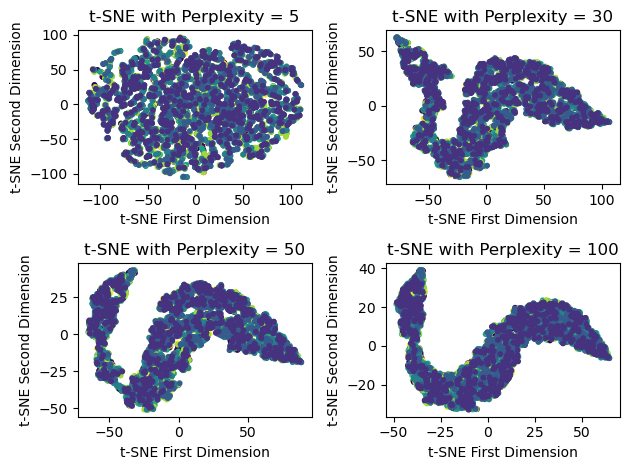

In [8]:
"""
Now fit and transform the record dataset with t-SNE function from sklearn. Also visualize how transforming can change
with different perplexity values (5,30,50,100). Use n_components=2 for creating a 2D transformed representation of 
the original data.
"""
#define perplexity parameter to iterate through
perplex = [5,30,50,100]

#for coloring the plot, convert categorical class labels to numerical representations
labels = rank_col.astype('category').cat.codes

#iterate through perplexity and also generate a plot
count = 0
for per in perplex:

    #count used for subplotting
    count += 1

    #set TSNE with parameters
    tsne = TSNE(n_components=2, perplexity=per, random_state=42) #use same seed for each perplexity case
    #fit/transform with record dataset
    current_tsne = tsne.fit_transform(combined_league_ranks)

    #now we should have a 2 dimensional representation of original dataset
    #plot the TSNE transformation with class labels for coloring
    plt.subplot(2,2,count)
    plt.scatter(current_tsne[:, 0], current_tsne[:, 1], c=labels, cmap='viridis', s=10)
    plt.xlabel('t-SNE First Dimension')
    plt.ylabel('t-SNE Second Dimension')
    plt.title(f't-SNE with Perplexity = {per}')

plt.tight_layout()
#save as .png
plt.savefig('tSNE_perplexities.png', bbox_inches='tight')

plt.show()
